# Visualizing fire scares through false color 
### Author: Isabella Segarra 
[Github repository](https://github.com/IsabellaSegarra/eds220-hwk4)

### Objective:
In January 2025, the Eaton and Palisades fires erupted in the foothills of Los Angeles county, devasting the region and displacing thousands. In this project, I integraded data from Landsat Collection 2 Level-2 atmospherically corrected surface reflactance data. This data has already been clipped to the area of the fire perimeters. This data is used to visualize the burn scars left from the Eaton and Palisades fire and is utilized with the fire perimeter data. 

### About the data:
- [Fire permimeter data](https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about) is from the county of Los Angeles via ArcGIS.  
- Landsat data is an `xarray.Dataset` from [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2).

### Analysis:
Key aspects of the analysis in this study include wrangling `netCDf4` data with `rioxarray` and `xarray` functions as well as mapping geospatial vector data with raster data.

### 1. Import libraries
The first step in processing data in Python is to import the necesary libraries. At a minumum, you need to always import libraries for data importing, wranglin/cleaning, and visualizing. 

In [25]:
# Environment set-up 
import pandas as pd # for data wrangling
import numpy as np  # for data wrangling 
import geopandas as gpd # for geospatial data 
import os # for data import
import matplotlib.pyplot as plt  # for visualizations 
import xarray as xr # for Netcdf4 data 
import rioxarray as rio # for xarray data 

### 2. Data Import
In this section, I will import the fire perimeter and landsat data. These files are stored in the 'data' folder of this repository. 

In [ ]:
# Import fire perimeter data
# Eaton fire >>>
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121') # use 'os' to specify file path 
eaton_perim = gpd.read_file(fp_eaton) # use 'gpd' to read in geospatial data 
# Palisades fire >>>
fp_palisades = os.path.join('data','Palisades_Perimeter_20250121') # use 'os' to specify file path 
palisades_perim = gpd.read_file(fp_palisades) # use 'gpd' to read in geospatial data 

The following data import is different than the data import for the fire perimeter data because the `landsat` data is a `netCDf4`. 

In [6]:
# Import Landsat data 
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

### 3. Fire perimeter data exploration 
In this section I will do some preliminary exploration of the fire data. Since this is geospatial data, I will do the following:
- check the *CRS* of each dataset 
- check if the data is projected 
- check if the data is multipolygon or polygon 


In [26]:
# Eaton fire perimeter

print('CRS:', eaton_perim.crs) 
print('Is geographic?:', eaton_perim.crs.is_geographic)
print('Is projected?:', eaton_perim.crs.is_projected)
print('Is geometry polygon?:', eaton_perim.geom_type)

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
dtype: object


In [27]:
# Palisades fire perimeter
print('CRS:', palisades_perim.crs)
print('Is geographic?:', palisades_perim.crs.is_geographic)
print('Is projected?:', palisades_perim.crs.is_projected)
print('Is geometry polygon?:', palisades_perim.geom_type)

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
20    Polygon
dtype: object


Although both datasets come from the same origin, it is best practice to check that their CRS's match.

In [28]:
# Assert that the CRSs match 
assert eaton_perim.crs == palisades_perim.crs

**Exploration Findings**

From my preliminary exploration, I see that both datasets have matching coordinate refrence systems, are both projected, and all have polygon geometries. 

### 4. Landsat data exploration 
In this section I will do some preliminary exploration of landsat data. I will do the following:
- view the attributes, dimensions, and variables of the data
- check the CRS of the data


In [5]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [ ]:
# Print the landsat CRS 
print(landsat.rio.crs)

None


**Exploration findings**

The `landsat` data contains coordinates (x,y) with time (z). The variables correspond to wavelengths red, green, blue, near infared (nir), short wave infared(swir22), and a spatial refrence variable with information relating to the cooordinate refrence system and datum. The CRS of the dataset is not directly accessibly through `rio.crs`. Through accessing the 'spatial_ref' variable, I learned tha the CRS for this dataset is 32611, which does not match the Eaton and Palisades fire perimeters' CRS. 

### 5.  Restoring geospatial information
Since the CRS of the `landsat` data is stored the 'spatial_ref' variable, in order to proceed with mapping the data, I need to restore the geospatial information. By storing the geospatial informaiton in a variable, this reduces the size and processing time of the `landsat` data.

In [9]:
# View the landsat crs by accessing it through the spatial_ref attribute. Store this variable.
landsat_crs = landsat.spatial_ref.crs_wkt
landsat_crs

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [10]:
# Recover geospatial information 
landsat = landsat.rio.write_crs(landsat_crs, inplace=True) # recover the CRS from the spatial_ref  

# Confirm CRS 
print(landsat.rio.crs)

EPSG:32611


### 6. True color imagery

In this section, I created two maps that display true color imagery, one with less specifications and one with the correct specifications. True color imagery displays colors within the light spectrum that humans can see (i.e., red, green, blue). In order to map the Landsat data with true colors, I need to access the red, green, and blue bands.

**True Color Map 1**: This map is the skeleton for **Map 2**. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


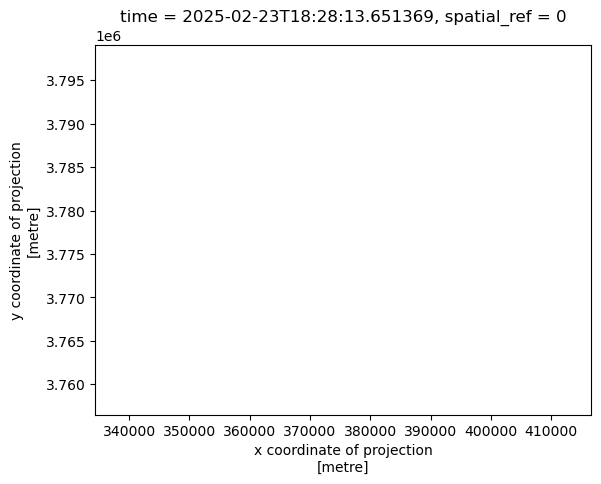

In [ ]:
# True Color Map 1
# plot RGB as a numpy array
landsat[["red", "green", "blue"]].to_array().plot.imshow()


The map above also displayed two warning messages. The first message pertained to how some RGB values are outside the allowed range for Matplotlib to plot, instead it will clip these values to fit. The second message pertains to the NAN values within the landsat data. Matplotlib does not account for data that is outside the 0-255 byte range. 

In order to fix the NAN warning, we need to fill the nan values. 

In order to fix the map, we need to adjust some parameters in the `.imshow()` argument. These inlcude the following:
- `robust= TRUE`: this ensures that the color limits are determined by the extreme values
- `vmin` and `vmax`: this defines the data range that the map, they represent darkness and brightness

In [ ]:
# Check for NA values in bands
rgb_na = landsat[['red', 'green', 'blue']].to_array().isnull().sum() # use .isnull() and count how many there are with .sum()
rgb_na

<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

Text(0, 0.5, 'Northing (m)')

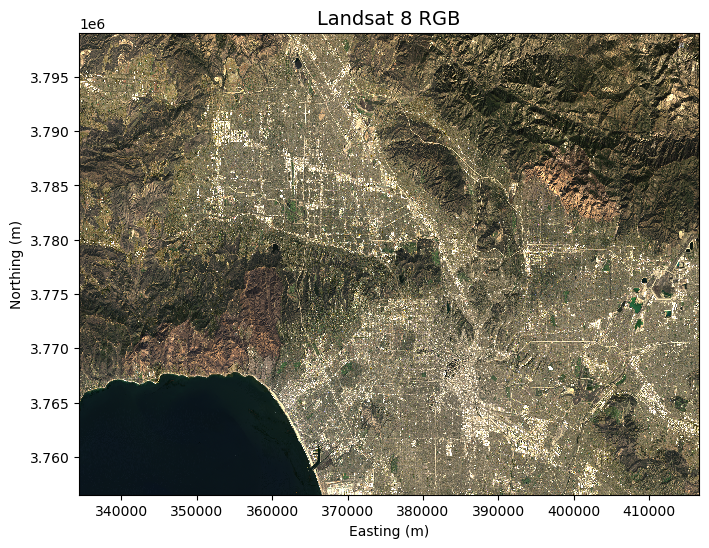

In [ ]:
# Plot figure 
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 
landsat[['red', 'green', 'blue']].to_array()
.fillna(0).plot.imshow( # add true colors data
    vmin= 7000, vmax=15200,  # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True, # gets rid of outliers 
    ax=ax,
)

ax.set_title("Landsat 8 True Color RGB", fontsize=14)


**Map 1 vs. Map 2** 

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

Text(0.5, 1.0, 'Landsat 8 False Color')

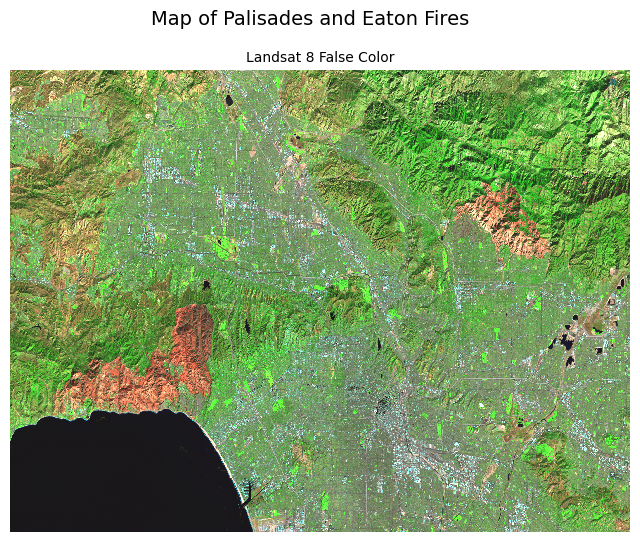

In [ ]:
# Plot figure 
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow( # add false colors
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True, # remove outliers
    ax=ax,
)

fig.suptitle("Map of Palisades and Eaton Fires", fontsize = 14)
ax.set_title("Landsat 8 False Color", fontsize=10)



## CRS Matching 

Before adding the Eaton and Palisades fire perimeters to do the map, I need to transform the CRS of Eaton and Palisades to match the landsat data. This ensures that the fire perimeters are correctly placed *spatially* on the landsat map.

In [15]:
# Transform fire perimeters to match the CRS of landsat 
eaton_perim = eaton_perim.to_crs(landsat.rio.crs)
palisades_perim = palisades_perim.to_crs(landsat.rio.crs)

In [16]:
# Assert that the CRS of Eaton matches the CRS of Palisades
assert eaton_perim.crs == palisades_perim.crs 

In [17]:
# Assert that the CRS of Palisades matches the CRS of landsat 
assert landsat.rio.crs == palisades_perim.crs 

In [31]:
import textwrap as tw

Text(0.5, -0.05, 'This map displays the locations of major world cities using the\nnaturalearth_cities dataset provided by GeoPandas.')

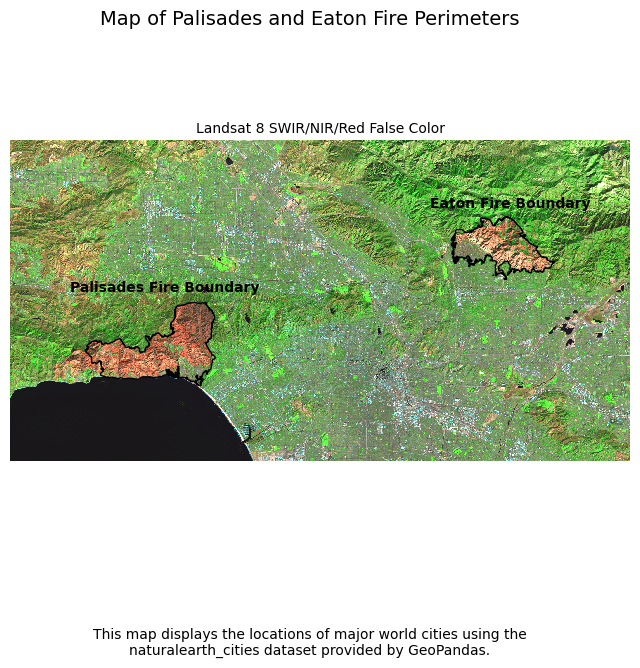

In [32]:
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 

landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow( # add landsat data
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True,
    ax=ax,
)
eaton_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Eaton fire perimeter')
palisades_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Palisades fire perimeter')

plt.figtext(x = .65,
            y = .65,
            s ="Eaton Fire Boundary",
            weight = 'bold')
plt.figtext(x = .2,
            y = .51,
            s ="Palisades Fire Boundary",
            weight = 'bold')
fig.suptitle("Map of Palisades and Eaton Fire Perimeters", fontsize = 14)
ax.set_title("Landsat 8 SWIR/NIR/Red False Color", fontsize=10)

#Define the caption text and wrap it if needed
caption_text = "This map displays the locations of major world cities using the naturalearth_cities dataset provided by GeoPandas."
wrapped_caption = tw.fill(caption_text, width=70) # Wrap text to a specific width

fig.text(0.5, -0.05, wrapped_caption, ha='center', va='top', fontsize=10)



Write a figure description for the map including a brief explanation of how false color imagery is being used.

